In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
from tqdm import tqdm
import numpy as np
from nltk.tokenize import sent_tokenize

# Research Paper
#### To what extend do cross cultural variations influence the performance of a binary classification model designed to categorise the nationality of Reddit authors into Western or Eastern European countries?

### Read CSVs

In [3]:
nationality = pd.read_csv("data/nationality.csv")
nationality.head()

,auhtor_ID,post,nationality
0,t2_10uons,"It isn't, it's just for show. It isn't legally...",Finland
1,t2_10uons,games won to games played. Games played is cal...,Finland
2,t2_10uons,So with that logic USA is a very shitty place ...,Finland
3,t2_10uons,"are referring to It does add up a lot when EA,...",Finland
4,t2_10uons,get another role than support Lel people here ...,Finland


In [4]:
nationality['nationality'].unique()

array(['Finland', 'Germany', 'Greece', 'The Netherlands', 'Ireland',
       'Spain', 'USA', 'United Kingdom', 'Denmark', 'Turkey', 'France',
       'Italy', 'Lithuania', 'Poland', 'Sweden', 'Romania', 'Switzerland',
       'Norway', 'Bulgaria', 'Hungary', 'Belgium', 'Serbia', 'Austria',
       'Ukraine', 'Croatia', 'Japan', 'Slovenia', 'Czech Republic',
       'Slovakia', 'Brazil', 'Australia', 'Cyprus', 'Luxembourg',
       'Argentina', 'Estonia', 'Philippines', 'Portugal', 'Azerbaijan',
       'Kosovo', 'Canada', 'Bosnia and Herzegovina', 'Israel', 'Mexico',
       'Armenia', 'Iceland', 'Albania', 'Georgia', 'Russia', 'Montenegro',
       'Moldova', 'Kazakhstan', 'Malta', 'Greenland', 'North Macedonia',
       'Iran', 'Chili'], dtype=object)

### Splitting the data into Western and Eastern European postings



In [5]:
Eastern = ['Greece', 'Poland', 'Romania', 'Bulgaria', 'Hungary', 'Serbia', 'Croatia', 'Slovenia', 'Czech Republic', 'Slovakia', 'Cyprus', 'Estonia', 'Kosovo', 'Bosnia and Herzegovina', 'Albania', 'Russia', 'Montenegro', 'Moldova', 'North Macedonia']

Western = ['Finland', 'Germany', 'The Netherlands', 'Ireland', 'Spain', 'USA', 'United Kingdom', 'Denmark', 'France', 'Italy', 'Luxembourg', 'Belgium', 'Sweden', 'Switzerland', 'Norway', 'Portugal']

nationality['Poles'] = nationality['nationality'].apply(lambda x: 'Western' if x in Western else ('Eastern' if x in Eastern else None))

In [6]:
nationality = nationality.dropna(subset=['Poles'])
nationality

,auhtor_ID,post,nationality,Poles
0,t2_10uons,"It isn't, it's just for show. It isn't legally...",Finland,Western
1,t2_10uons,games won to games played. Games played is cal...,Finland,Western
2,t2_10uons,So with that logic USA is a very shitty place ...,Finland,Western
3,t2_10uons,"are referring to It does add up a lot when EA,...",Finland,Western
4,t2_10uons,get another role than support Lel people here ...,Finland,Western
...,...,...,...,...
82611,t2_57ogt82f,and Sergeant York. WWI didn't lend it'self to ...,United Kingdom,Western
82612,t2_57ogt82f,a position where a person can get short term f...,United Kingdom,Western
82613,t2_57ogt82f,you have to read the label. Some are just as h...,United Kingdom,Western
82614,t2_57ogt82f,as traitors. Some suggesting it was treason. T...,United Kingdom,Western


### West VS. East Posts

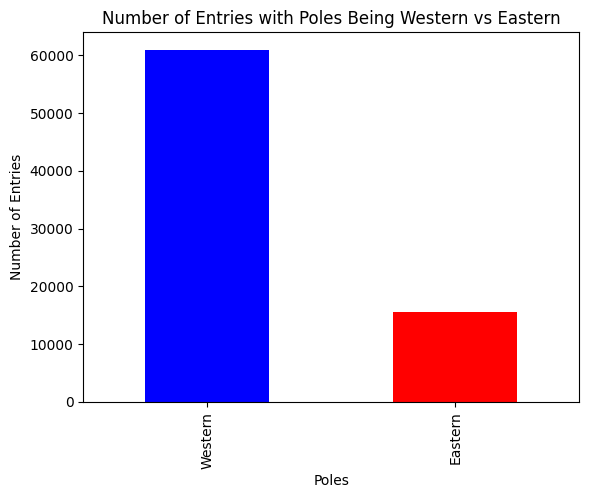

In [7]:
# Plot the bar chart
counts = nationality['Poles'].value_counts()
counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Number of Entries with Poles Being Western vs Eastern')
plt.xlabel('Poles')
plt.ylabel('Number of Entries')
plt.show()

In [11]:
western = nationality[nationality['Poles'] == 'Western']
eastern = nationality[nationality['Poles'] == 'Eastern']

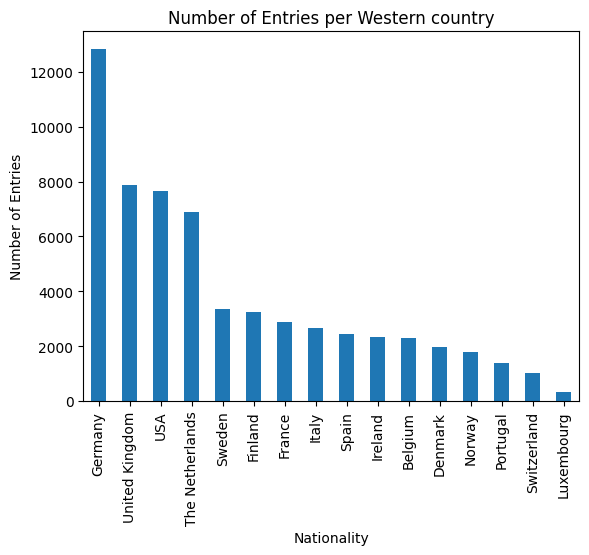

In [9]:
counts = western['nationality'].value_counts()
counts.plot(kind='bar')
plt.title('Number of Entries per Western country')
plt.xlabel('Nationality')
plt.ylabel('Number of Entries')
plt.show()

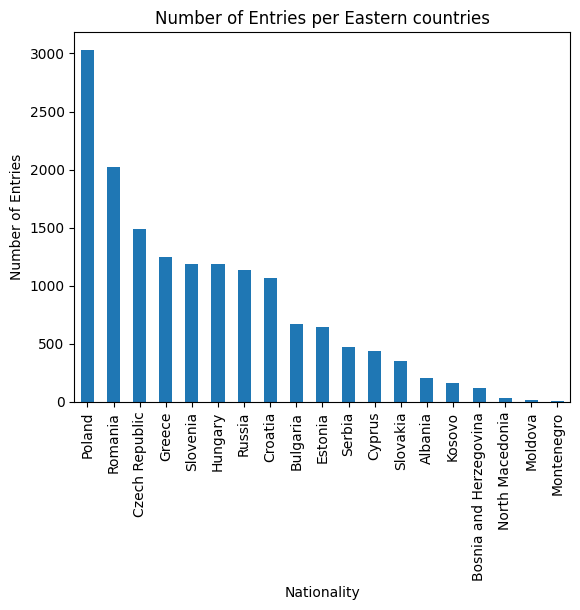

In [12]:
counts = eastern['nationality'].value_counts()
counts.plot(kind='bar')
plt.title('Number of Entries per Eastern countries')
plt.xlabel('Nationality')
plt.ylabel('Number of Entries')
plt.show()

## EDA

### Step 1: Lowercasing

In [3]:
nationality['post'] = nationality['post'].str.lower()

NameError: name 'nationality' is not defined

### Step 2: Removing Stop Words

In [17]:
# Download NLTK stopwords
nltk.download('stopwords')

# Get English stop words from NLTK
stop_words = set(stopwords.words('english'))

# Function to remove stop words from a text
def remove_stopwords(text):
    words = text.split()  # Split the text into words
    filtered_words = [word for word in words if word.lower() not in stop_words]  # Remove stop words
    return ' '.join(filtered_words)

# Apply the remove_stopwords function to the "post" column
nationality['post'] = nationality['post'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/pamelacece/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### **Note**: Only for English dictionary. Need to discuss if we're keeping other languages in. ONLY ENGLISH

### Step 3: Lemmatization

In [21]:
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

def lemmatize_posts(text):
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

nationality['post'] = nationality['post'].apply(lemmatize_posts)

nationality

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/pamelacece/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,auhtor_ID,post,nationality,Poles
0,t2_10uons,"isn't, show. legally binding. depends also ran...",Finland,Western
1,t2_10uons,game game played. game played calculated compa...,Finland,Western
2,t2_10uons,logic usa shitty place live (with ~1 shooting ...,Finland,Western
3,t2_10uons,"referring add lot ea, activision etc.. re-rele...",Finland,Western
4,t2_10uons,get another role support lel people thinking 2...,Finland,Western
...,...,...,...,...
82611,t2_57ogt82f,sergeant york. wwi lend it'self films. fought ...,United Kingdom,Western
82612,t2_57ogt82f,position person get short term fame committing...,United Kingdom,Western
82613,t2_57ogt82f,"read label. high red meat, yet others low. qua...",United Kingdom,Western
82614,t2_57ogt82f,traitors. suggesting treason. treason death pe...,United Kingdom,Western


### Step 4: Tokenization

In [23]:
# Load the spaCy English model
nlp = spacy.load("en_core_web_lg")

# Function to tokenize a text using spaCy
def tokenize_text(text):
    doc = nlp(text)
    tokens = [token.text for token in doc]
    return tokens

# Apply the tokenize_text function to the "post" column
nationality['post_tokens'] = nationality['post'].apply(tokenize_text)

In [26]:
nationality.to_csv('tokenized_non-eng.csv')

### Step 5: Remove Non-English entries

In [4]:
nationality = pd.read_csv('tokenized_non-eng.csv')

Only removing the non-English tokens

In [5]:
import nltk

nltk.download('words')  # Download English word list if not already installed

# Load the English word list
english_words = set(nltk.corpus.words.words())

def remove_non_english_tokens(tokens):
    filtered_tokens = []
    current_word = ""
    for token in tokens:
        if token.isalpha():  # Check if it's a letter
            current_word += token
        else:
            if current_word.lower() in english_words:
                filtered_tokens.append(current_word)
            current_word = ""

    if current_word.lower() in english_words:  # Add the last word if needed
        filtered_tokens.append(current_word)
    return filtered_tokens

nationality = nationality.rename(columns={'post_tokens': 'tokens'})
nationality['eng_tokens'] = tqdm(nationality['tokens'].apply(remove_non_english_tokens))

[nltk_data] Downloading package words to /home/pamelacece/nltk_data...
[nltk_data]   Package words is already up-to-date!
100%|██████████| 76405/76405 [00:00<00:00, 1611125.73it/s]


In [6]:
def add_quotes(tokens):
    return ["'" + token + "'" for token in tokens]

nationality['eng_tokens'] = nationality['eng_tokens'].apply(add_quotes)


In [22]:
nationality

,auhtor_ID,post,nationality,Poles,tokens,eng_tokens
0,t2_10uons,"isn't, show. legally binding. depends also ran...",Finland,Western,"['is', ""n't"", ',', 'show', '.', 'legally', 'bi...","['is', 'n', 't', 'show', 'legally', 'binding',..."
1,t2_10uons,game game played. game played calculated compa...,Finland,Western,"['game', 'game', 'played', '.', 'game', 'playe...","['game', 'game', 'game', 'calculated', 'much',..."
2,t2_10uons,logic usa shitty place live (with ~1 shooting ...,Finland,Western,"['logic', 'usa', 'shitty', 'place', 'live', '(...","['logic', 'place', 'live', 'with', 'shooting',..."
3,t2_10uons,"referring add lot ea, activision etc.. re-rele...",Finland,Western,"['referring', 'add', 'lot', 'ea', ',', 'activi...","['add', 'lot', 'ea', 're', 'release', 'game', ..."
4,t2_10uons,get another role support lel people thinking 2...,Finland,Western,"['get', 'another', 'role', 'support', 'lel', '...","['get', 'another', 'role', 'support', 'people'..."
...,...,...,...,...,...,...
76400,t2_57ogt82f,sergeant york. wwi lend it'self films. fought ...,United Kingdom,Western,"['sergeant', 'york', '.', 'wwi', 'lend', ""it's...","['sergeant', 'york', 'lend', 'it', 'self', 'fo..."
76401,t2_57ogt82f,position person get short term fame committing...,United Kingdom,Western,"['position', 'person', 'get', 'short', 'term',...","['position', 'person', 'get', 'short', 'term',..."
76402,t2_57ogt82f,"read label. high red meat, yet others low. qua...",United Kingdom,Western,"['read', 'label', '.', 'high', 'red', 'meat', ...","['read', 'label', 'high', 'red', 'meat', 'yet'..."
76403,t2_57ogt82f,traitors. suggesting treason. treason death pe...,United Kingdom,Western,"['traitors', '.', 'suggesting', 'treason', '.'...","['suggesting', 'treason', 'treason', 'death', ..."


In [7]:
nationality = nationality.drop(['Unnamed: 0'], axis=1)

In [12]:
nationality.to_csv('tokenized_eng.csv', index=False)

In [ ]:
nationality = pd.read_csv('tokenized_eng.csv')

## Analysis

In [19]:
grouped = nationality.groupby('auhtor_ID').agg({'post': ' '.join, 'Poles': 'first'}).reset_index()

### Average word length

In [31]:
nationality['average_word_length'] = nationality['post'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()))

In [38]:
grouped['average_word_length'] = grouped['post'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()))

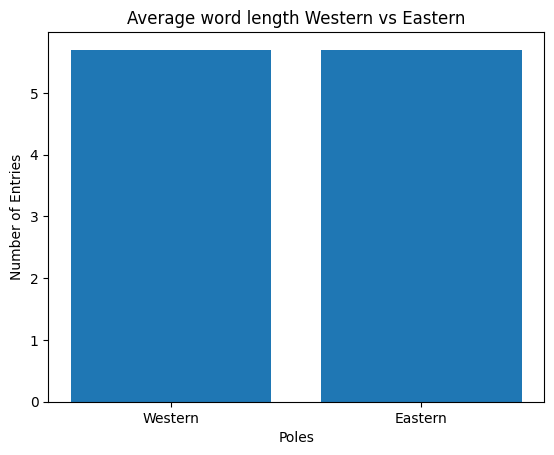

In [42]:
# Plot the bar chart
counts = grouped['average_word_length'].median()
poles = grouped['Poles'].unique()

plt.bar(poles, counts)
plt.title('Average word length Western vs Eastern')
plt.xlabel('Poles')
plt.ylabel('Number of Entries')
plt.show()

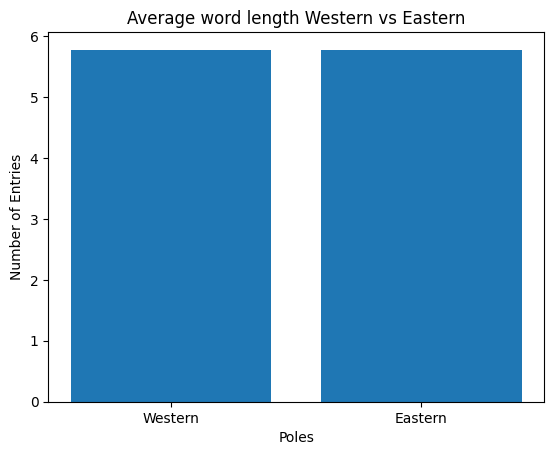

In [43]:
# Plot the bar chart
counts = nationality['average_word_length'].median()
poles = nationality['Poles'].unique()

plt.bar(poles, counts)
plt.title('Average word length Western vs Eastern')
plt.xlabel('Poles')
plt.ylabel('Median Word Length' )
plt.show()

### Average Sentence Length

In [36]:
nltk.download('punkt')

nationality['avg_sentence_length'] = nationality['post'].apply(lambda x: sum(len(s) for s in sent_tokenize(x)) / len(sent_tokenize(x)))

[nltk_data] Downloading package punkt to /home/pamelacece/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [44]:
grouped['avg_sentence_length'] = grouped['post'].apply(lambda x: sum(len(s) for s in sent_tokenize(x)) / len(sent_tokenize(x)))

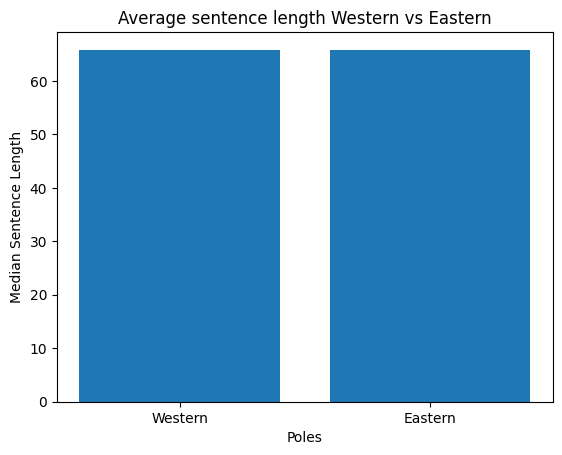

In [45]:
# Plot the bar chart
counts = nationality['avg_sentence_length'].median()
poles = nationality['Poles'].unique()

plt.bar(poles, counts)
plt.title('Average sentence length Western vs Eastern')
plt.xlabel('Poles')
plt.ylabel('Median Sentence Length')
plt.show()

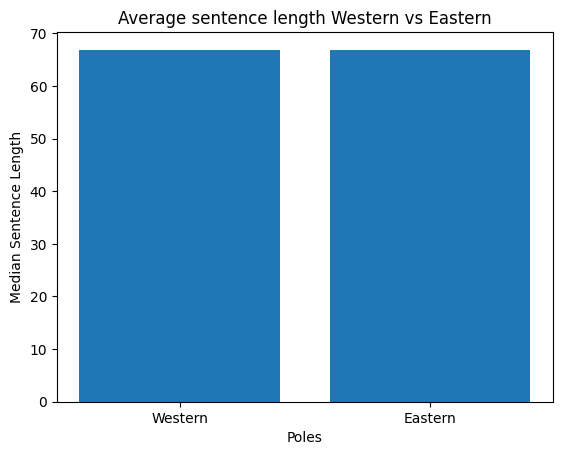

In [46]:
# Plot the bar chart
counts = grouped['avg_sentence_length'].median()
poles = grouped['Poles'].unique()
